In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("youssefsalahzakria/fruit-and-vegetables-classification")

print("Path to dataset files:", path)

100%|██████████| 4.82G/4.82G [00:52<00:00, 99.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/youssefsalahzakria/fruit-and-vegetables-classification/versions/5


In [ ]:
import os
dataset_path = "/root/.cache/kagglehub/datasets/youssefsalahzakria/fruit-and-vegetables-classification/versions/5/train"

In [ ]:
categories = sorted(os.listdir(dataset_path))

category_counts = {}
for category in categories:
    category_path = os.path.join(dataset_path, category)
    num_images = len(os.listdir(category_path))
    category_counts[category] = num_images
print("Number of images in each category:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

Number of images in each category:
Apple: 1321
Avocado: 1041
Banana: 1866
Beetroot: 224
Blackberry: 891
Blueberry: 669
Broccoli: 1473
Cabbage: 192
Capsicum: 960
Carrot: 836
Cauliflower: 1229
Chilli Peper: 400
Corn: 1284
Cucumber: 1442
Dates: 422
Dragonfruit: 951
Eggplant: 835
Fig: 802
Garlic: 498
Ginger: 753
Grapes: 1740
Guava: 667
Jalepeno: 133
Kiwi: 1152
Lemon: 1284
Lettuce: 291
Mango: 1380
Mushroom: 353
Okra: 416
Olive: 598
Onion: 1216
Orange: 2697
Paprika: 83
Peanuts: 441
Pear: 1114
Peas: 1470
Pineapple: 1668
Pomegranate: 2344
Potato: 477
Pumpkin: 210
Raddish: 795
Rambutan: 747
Soy Beans: 852
Spinach: 841
Strawberry: 1479
Sweetcorn: 183
Sweetpotato: 1084
Tomato: 723
Turnip: 240
Watermelon: 1424


In [ ]:
import random
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
output_path = "/root/.cache/kagglehub/datasets/augmented_dataset"

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

if not os.path.exists(output_path):
    os.makedirs(output_path)

for category in sorted(os.listdir(dataset_path)):
    category_path = os.path.join(dataset_path, category)
    output_category_path = os.path.join(output_path, category)
    os.makedirs(output_category_path, exist_ok=True)

    image_files = os.listdir(category_path)
    for img_file in image_files:
        shutil.copy(os.path.join(category_path, img_file), output_category_path)

    num_images = len(image_files)

    if num_images > 500:
        excess_images = num_images - 500
        print(f"Removing {excess_images} images from {category}...")
        images_to_remove = random.sample(image_files, excess_images)

        for img in images_to_remove:
            os.remove(os.path.join(output_category_path, img))

    elif num_images < 500:
        images_to_generate = 500 - num_images
        print(f"Augmenting {category}: Generating {images_to_generate} new images...")

        img_files = os.listdir(output_category_path)
        for img_file in img_files:
            if images_to_generate <= 0:
                break
            img_path = os.path.join(output_category_path, img_file)
            img = load_img(img_path)
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)

            i = 0
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_category_path,
                                      save_prefix=category, save_format="jpg"):
                i += 1
                images_to_generate -= 1
                if images_to_generate <= 0:
                    break
category_counts = {cat: len(os.listdir(os.path.join(output_path, cat))) for cat in sorted(os.listdir(output_path))}
print("Final image count per category:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

Removing 821 images from Apple...
Removing 541 images from Avocado...
Removing 1366 images from Banana...
Augmenting Beetroot: Generating 276 new images...
Removing 391 images from Blackberry...
Removing 169 images from Blueberry...
Removing 973 images from Broccoli...
Augmenting Cabbage: Generating 308 new images...
Removing 460 images from Capsicum...
Removing 336 images from Carrot...
Removing 729 images from Cauliflower...
Augmenting Chilli Peper: Generating 100 new images...
Removing 784 images from Corn...
Removing 942 images from Cucumber...
Augmenting Dates: Generating 78 new images...
Removing 451 images from Dragonfruit...
Removing 335 images from Eggplant...
Removing 302 images from Fig...
Augmenting Garlic: Generating 2 new images...
Removing 253 images from Ginger...
Removing 1240 images from Grapes...
Removing 167 images from Guava...
Augmenting Jalepeno: Generating 367 new images...
Removing 652 images from Kiwi...
Removing 784 images from Lemon...
Augmenting Lettuce: Ge

In [ ]:
category_counts = {cat: len(os.listdir(os.path.join(output_path, cat))) for cat in sorted(os.listdir(output_path))}

for category, count in category_counts.items():
    print(f"{category}: {count}")


Apple: 500
Avocado: 500
Banana: 500
Beetroot: 495
Blackberry: 500
Blueberry: 500
Broccoli: 500
Cabbage: 491
Capsicum: 500
Carrot: 500
Cauliflower: 500
Chilli Peper: 500
Corn: 500
Cucumber: 500
Dates: 500
Dragonfruit: 500
Eggplant: 500
Fig: 500
Garlic: 500
Ginger: 500
Grapes: 500
Guava: 500
Jalepeno: 490
Kiwi: 500
Lemon: 500
Lettuce: 498
Mango: 500
Mushroom: 500
Okra: 500
Olive: 500
Onion: 500
Orange: 500
Paprika: 488
Peanuts: 500
Pear: 500
Peas: 500
Pineapple: 500
Pomegranate: 500
Potato: 500
Pumpkin: 497
Raddish: 500
Rambutan: 500
Soy Beans: 500
Spinach: 500
Strawberry: 500
Sweetcorn: 496
Sweetpotato: 500
Tomato: 500
Turnip: 492
Watermelon: 500


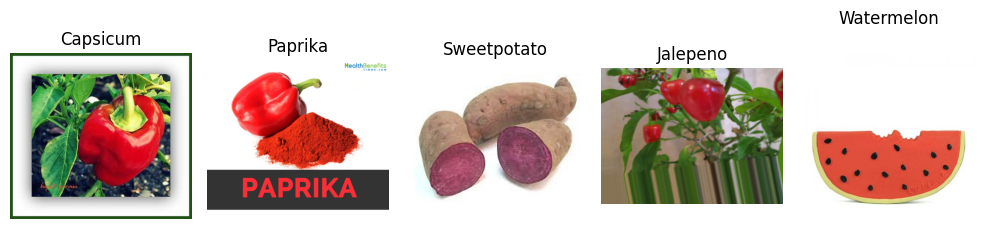

In [ ]:
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import load_img

categories = sorted(os.listdir(output_path))

random_categories = random.sample(categories, min(5, len(categories)))
plt.figure(figsize=(10, 10))

for i, category in enumerate(random_categories):
    category_path = os.path.join(output_path, category)
    images = os.listdir(category_path)

    if images:
        random_image = random.choice(images)
        img_path = os.path.join(category_path, random_image)
        img = load_img(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis("off")

plt.tight_layout()
plt.show()


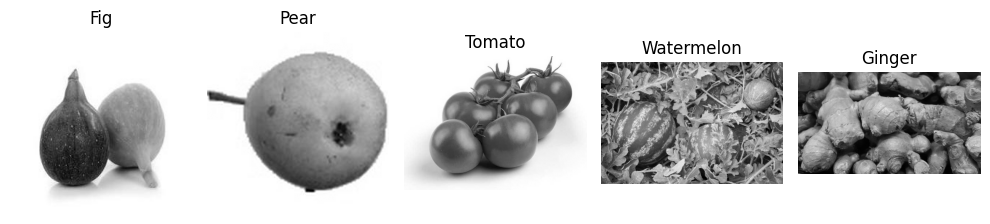

In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

random_categories = random.sample(categories, min(5, len(categories)))
plt.figure(figsize=(10, 10))

for i, category in enumerate(random_categories):
    category_path = os.path.join(output_path, category)
    images = os.listdir(category_path)

    if images:
        random_image = random.choice(images)
        img_path = os.path.join(category_path, random_image)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(category)
        plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
train_data_dir = "/root/.cache/kagglehub/datasets/augmented_dataset"
img_size = (150, 150)
batch_size = 32
epochs = 10


In [ ]:
datagen = ImageDataGenerator(validation_split=0.2, rescale=1.0/255)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

num_classes = len(train_generator.class_indices)

Found 19959 images belonging to 50 classes.
Found 4985 images belonging to 50 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 51/625 ━━━━━━━━━━━━━━━━━━━━ 1:32 160ms/step - accuracy: 0.0175 - loss: 4.1070

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 188ms/step - accuracy: 0.0777 - loss: 3.5989 - val_accuracy: 0.3389 - val_loss: 2.4747
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 160ms/step - accuracy: 0.2783 - loss: 2.6095 - val_accuracy: 0.4010 - val_loss: 2.1382
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 157ms/step - accuracy: 0.3612 - loss: 2.2638 - val_accuracy: 0.4305 - val_loss: 2.0417
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 155ms/step - accuracy: 0.4308 - loss: 2.0014 - val_accuracy: 0.4898 - val_loss: 1.9027
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 155ms/step - accuracy: 0.5006 - loss: 1.7291 - val_accuracy: 0.5200 - val_loss: 1.7965
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 155ms/step - accuracy: 0.5705 - loss: 1.4507 - val_accuracy: 0.5072 - val_loss: 1.8499
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 160ms/step - accuracy: 0.6318 - loss: 1.2286 - val_accuracy: 0.5242 - val_loss: 1.8153
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 154ms/step - accuracy: 0.6821 - loss: 1.0415 - 

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


In [ ]:
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 19959 images belonging to 50 classes.
Found 4985 images belonging to 50 classes.


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 94/624 ━━━━━━━━━━━━━━━━━━━━ 1:22 155ms/step - accuracy: 0.0336 - loss: 4.6672

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


624/624 ━━━━━━━━━━━━━━━━━━━━ 139s 209ms/step - accuracy: 0.0901 - loss: 3.7622 - val_accuracy: 0.3308 - val_loss: 2.4971
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 114s 175ms/step - accuracy: 0.3040 - loss: 2.5423 - val_accuracy: 0.4096 - val_loss: 2.1198
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 111s 177ms/step - accuracy: 0.4532 - loss: 1.9345 - val_accuracy: 0.4712 - val_loss: 1.9590
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 107s 171ms/step - accuracy: 0.5833 - loss: 1.4449 - val_accuracy: 0.5005 - val_loss: 1.8749
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 105s 168ms/step - accuracy: 0.6996 - loss: 1.0184 - val_accuracy: 0.5234 - val_loss: 1.9248
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 146s 174ms/step - accuracy: 0.7880 - loss: 0.7151 - val_accuracy: 0.5123 - val_loss: 2.1384
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 106s 170ms/step - accuracy: 0.8362 - loss: 0.5376 - val_accuracy: 0.5168 - val_loss: 2.3325
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 107s 171ms/step - accuracy: 0.8662 - loss: 0.44

In [ ]:
model.save("model.h5")

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=-1)

print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))


156/156 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step
              precision    recall  f1-score   support

       Apple       0.02      0.01      0.01       100
     Avocado       0.01      0.02      0.01       100
      Banana       0.01      0.01      0.01       100
    Beetroot       0.00      0.00      0.00        99
  Blackberry       0.02      0.03      0.03       100
   Blueberry       0.01      0.01      0.01       100
    Broccoli       0.02      0.03      0.02       100
     Cabbage       0.03      0.03      0.03        98
    Capsicum       0.03      0.03      0.03       100
      Carrot       0.02      0.02      0.02       100
 Cauliflower       0.01      0.01      0.01       100
Chilli Peper       0.00      0.00      0.00       100
        Corn       0.01      0.02      0.02       100
    Cucumber       0.01      0.01      0.01       100
       Dates       0.02      0.01      0.01       100
 Dragonfruit       0.00      0.00      0.00       100
    Eggplant       0.01      0.01    

 57/156 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step


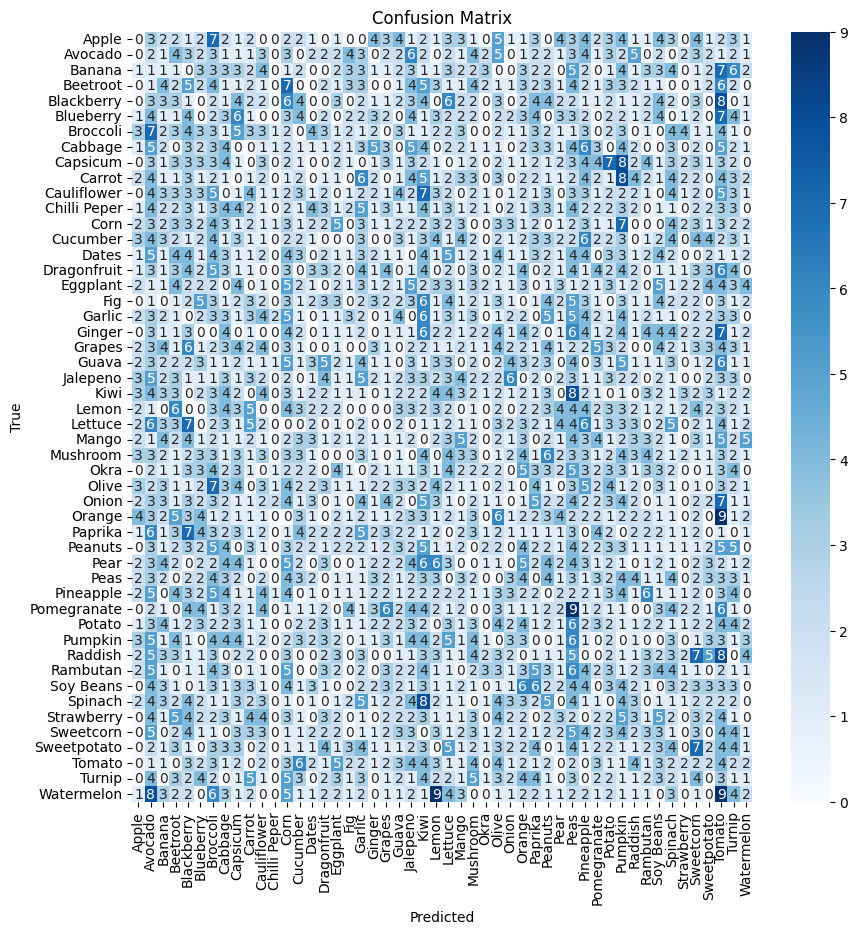

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=-1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(train_generator.class_indices.keys()),
            yticklabels=list(train_generator.class_indices.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


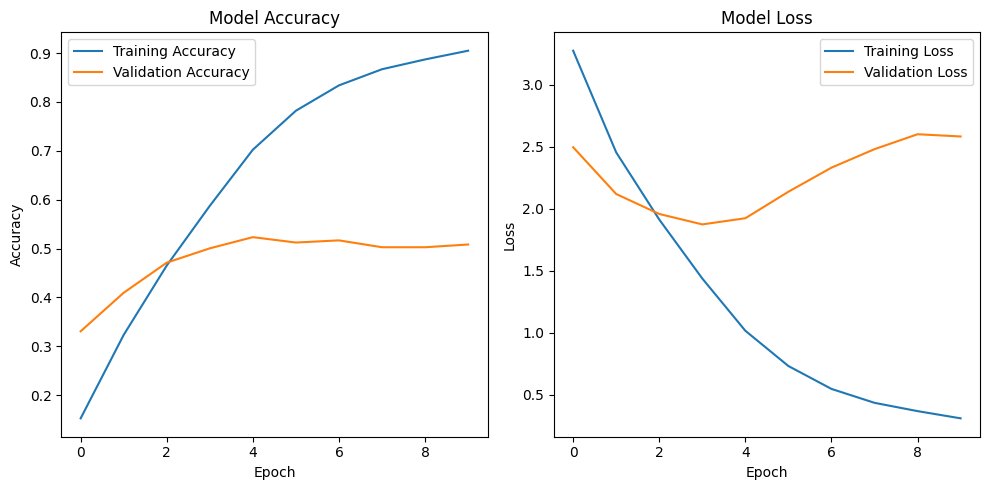

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()


Saving c.jpg to c (3).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
c (3).jpg


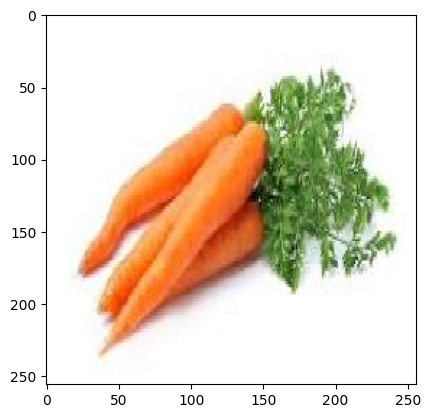

Predicted Class: Carrot


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

model = tf.keras.models.load_model("model.h5")

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  plt.imshow(img)
  plt.show()

  predicted_class_index = np.argmax(classes[0])

  class_indices = {v: k for k, v in train_generator.class_indices.items()}
  predicted_class_name = class_indices.get(predicted_class_index, "Unknown")

  print("Predicted Class:", predicted_class_name)


In [ ]:
train_accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']


In [ ]:


from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(train_accuracies, val_accuracies)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between training and validation accuracies.")
else:
    print("There is no statistically significant difference between training and validation accuracies.")


T-statistic: 2.0360406553859027
P-value: 0.0567356479274386
There is no statistically significant difference between training and validation accuracies.


In [ ]:

from scipy.stats import ttest_ind


t_statistic, p_value = ttest_ind(train_accuracies, val_accuracies)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between training and validation accuracies.")
else:
    print("There is no statistically significant difference between training and validation accuracies.")


T-statistic: 2.0360406553859027
P-value: 0.0567356479274386
There is no statistically significant difference between training and validation accuracies.


In [ ]:

t_statistic, p_value = ttest_ind(train_accuracies, val_accuracies)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between training and validation accuracies.")
else:
    print("There is no statistically significant difference between training and validation accuracies.")


T-statistic: 2.0360406553859027
P-value: 0.0567356479274386
There is no statistically significant difference between training and validation accuracies.


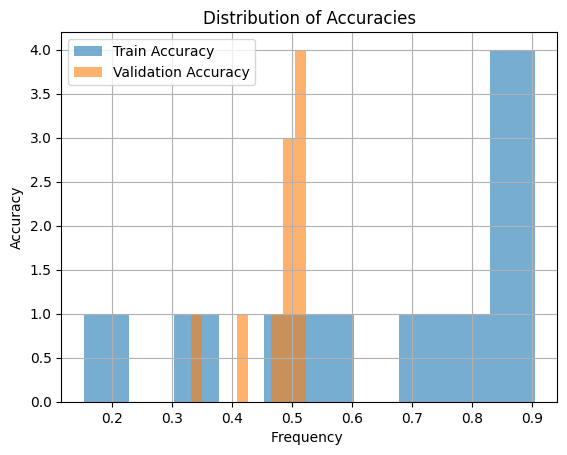

In [ ]:
import matplotlib.pyplot as plt

plt.hist(train_accuracies, bins=10, alpha=0.6, label='Train Accuracy')
plt.hist(val_accuracies, bins=10, alpha=0.6, label='Validation Accuracy')
plt.legend()
plt.title("Distribution of Accuracies")
plt.xlabel("Frequency ")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
